In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.io import wavfile
import os, librosa
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [2]:
data = "total/"

In [3]:
X = []
y = []
plt.show()
for root, dirs, files in os.walk(data):
    for file in files:
        x, sr = librosa.load(data + file)
        X.append(x)
        y.append(file)
        
print(f"Sampling rate is {sr}")

Sampling rate is 22050


## Plotting

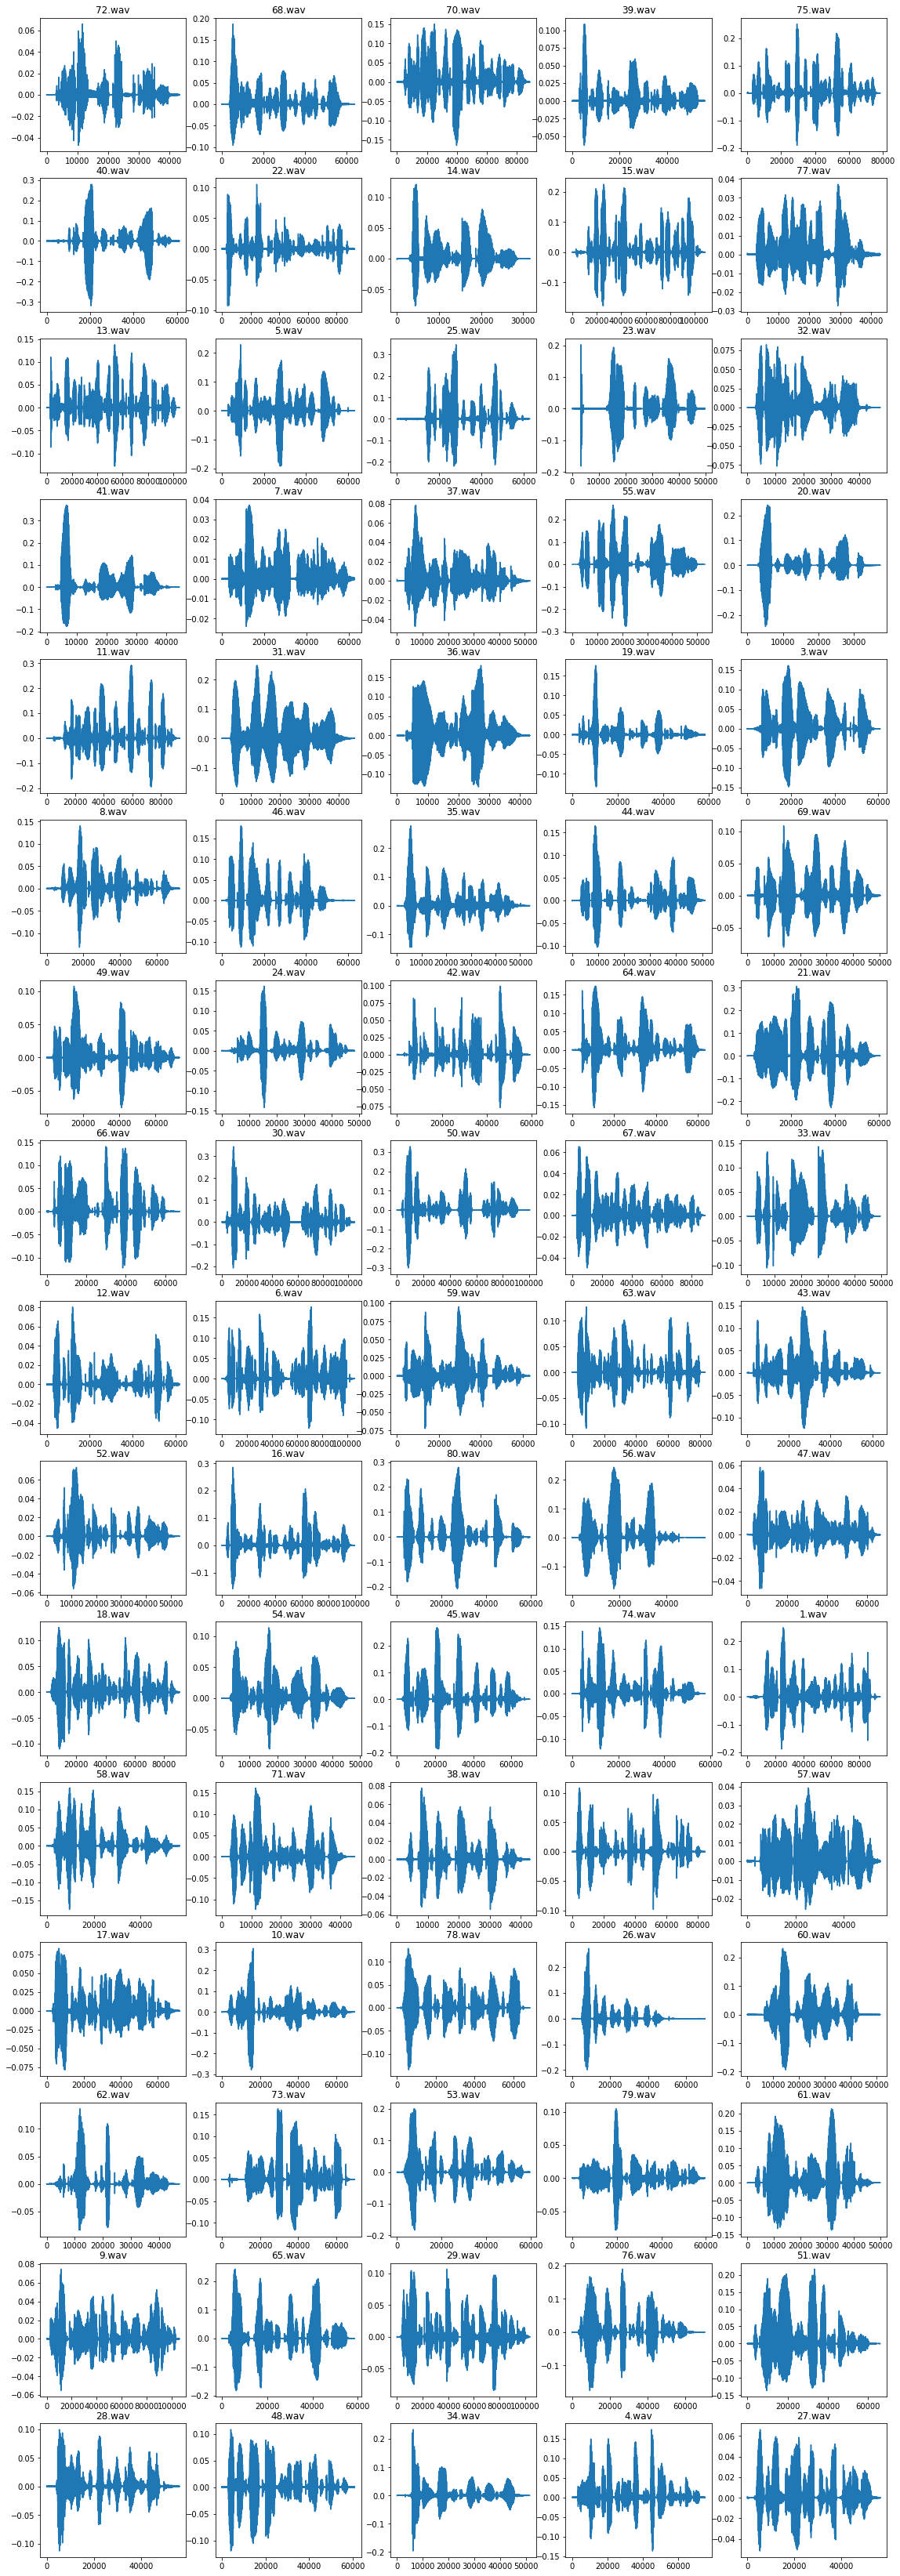

In [4]:
fig, ax = plt.subplots(nrows=16, ncols=5, figsize=(15,15))
count = 0
fig.subplots_adjust(bottom = 0)
fig.subplots_adjust(top = 3)
fig.subplots_adjust(right = 1)
fig.subplots_adjust(left = 0)
for row in ax:
    for col in row:
        col.plot(X[count])
        col.title.set_text(y[count])
        count += 1

Changing sampling rate = 16000

In [5]:
X = []
y = []
plt.show()
for root, dirs, files in os.walk(data):
    for file in files:
        x, sr = librosa.load(data + file, sr=16000)
        X.append(x)
        y.append(file)
        
print(f"Sampling rate is {sr}")

Sampling rate is 16000


## Plotting audio files at sampling rate 16000

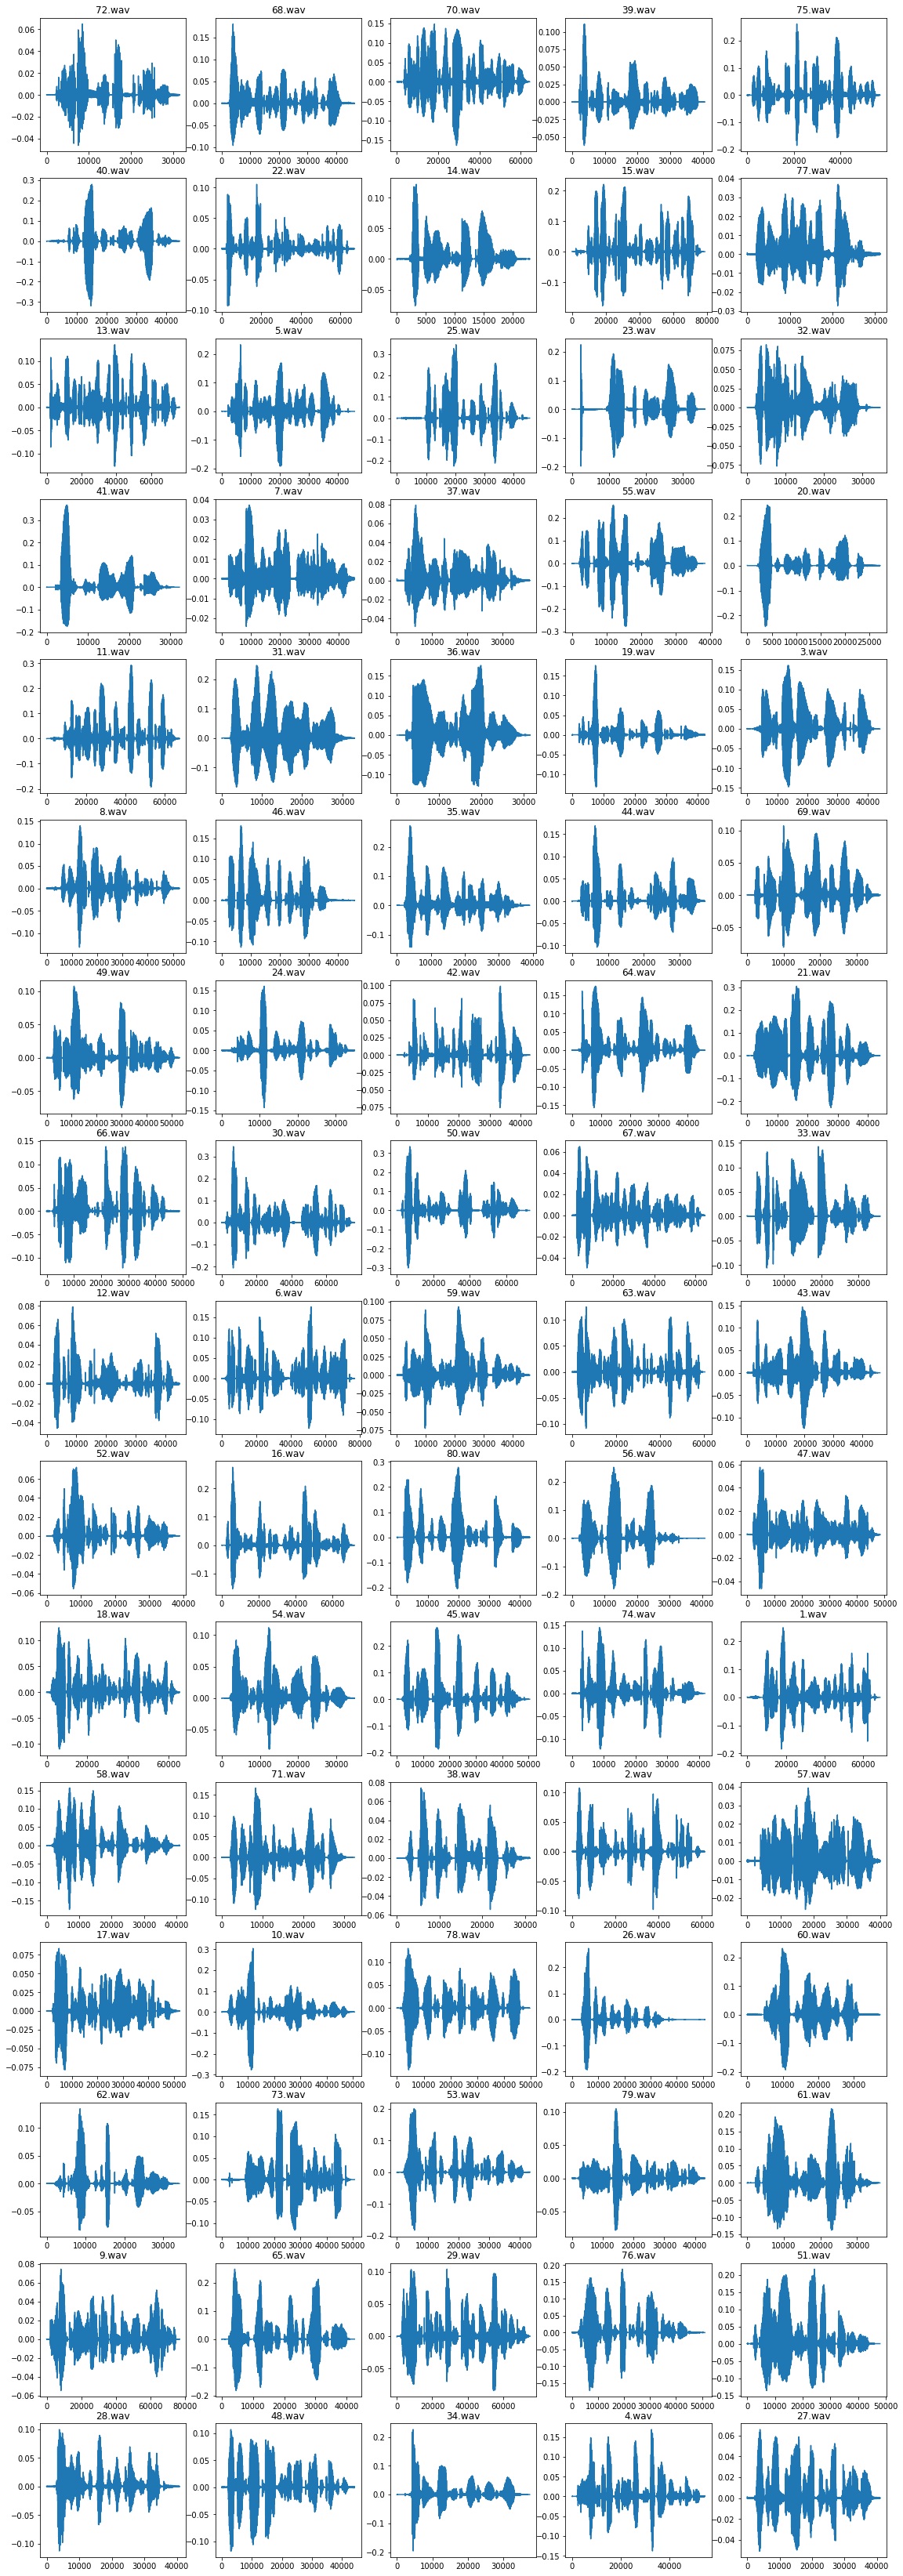

In [6]:
fig, ax = plt.subplots(nrows=16, ncols=5, figsize=(15,15))
count = 0
fig.subplots_adjust(bottom = 0)
fig.subplots_adjust(top = 3)
fig.subplots_adjust(right = 1)
fig.subplots_adjust(left = 0)
for row in ax:
    for col in row:
        col.plot(X[count])
        col.title.set_text(y[count])
        count += 1

        

In [7]:
min_length = 1e9
for i in X:
    min_length = min(min_length, len(i))
min_length

22938

In [8]:
# making length of all audio file same, equal to min length 
for i in range(len(X)):
    X[i] = X[i][:min_length]


## GMM model

## Using 2000 features for each audio file

### 2 clusters

In [29]:
# since 22938 features are too much for mere 16 GB ram
# selecting first 2000 features
X = np.array(X)
X_small = X[:,:2000]

In [30]:
X_small.shape

(80, 2000)

In [37]:
X_small = np.array(X_small)
gmm = GaussianMixture(n_components=2, random_state=1)
gmm.fit(X_small)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=1, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [38]:
report_2_cluster = gmm.predict(X_small)
report_2_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

### 5 clusters

In [39]:
X = np.array(X)
X_small = X[:,:2000]
X_small = np.array(X_small)
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X_small)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [40]:
report_5_cluster = gmm.predict(X_small)
report_5_cluster

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0])

### 10 clusters

In [41]:
X = np.array(X)
X_small = X[:,:2000]
X_small = np.array(X_small)
gmm = GaussianMixture(n_components=10, random_state=42)
gmm.fit(X_small)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=10, n_init=1,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [42]:
report_10_cluster = gmm.predict(X_small)
report_10_cluster

array([6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0,
       6, 6, 0, 0, 4, 6, 6, 6, 6, 0, 6, 6, 0, 5, 6, 6, 6, 6, 6, 0, 6, 6,
       0, 6, 6, 6, 6, 6, 0, 6, 0, 6, 8, 1, 6, 6, 0, 0, 6, 6, 6, 7, 9, 6,
       0, 0, 6, 6, 6, 6, 6, 6, 0, 6, 3, 6, 6, 0])

## Report

In [43]:
print("Report for 2 clusters:")
print(report_2_cluster)

Report for 2 clusters:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0]


In [44]:
print("Report for 5 cluster:")
print(report_5_cluster)

Report for 5 cluster:
[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0
 0 0 4 0 0 0]


In [45]:
print("Report for 10 cluster:")
print(report_10_cluster)

Report for 10 cluster:
[6 6 6 6 2 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 0 6 6 0 0 4 6 6 6 6 0 6 6 0 5 6
 6 6 6 6 0 6 6 0 6 6 6 6 6 0 6 0 6 8 1 6 6 0 0 6 6 6 7 9 6 0 0 6 6 6 6 6 6
 0 6 3 6 6 0]


## Using 5000 features

### 2 clusters

In [17]:
# since 22938 features are too much for mere 16 GB ram
# selecting first 5000 features
X = np.array(X)
X_small = X[:,:5000]
X_small = np.array(X_small)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X_small)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [18]:
report_2_cluster = gmm.predict(X_small)
report_2_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 5 clusters

In [14]:
# since 22938 features are too much for mere 16 GB ram
# selecting first 5000 features
X = np.array(X)
X_small = X[:,:5000]
X_small = np.array(X_small)
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X_small)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [15]:
report_5_cluster = gmm.predict(X_small)
report_5_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 10 clusters

In [9]:
# since 22938 features are too much for mere 16 GB ram
# selecting first 5000 features
X = np.array(X)
X_small = X[:,:5000]
X_small = np.array(X_small)
gmm = GaussianMixture(n_components=10, random_state=42)
gmm.fit(X_small)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=10, n_init=1,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [12]:
report_10_cluster = gmm.predict(X_small)
report_10_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 8, 4, 1, 7,
       1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 5, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Report

In [19]:
print("Report for 2 clusters:")
print(report_2_cluster)

Report for 2 clusters:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


In [16]:
print("Report for 5 cluster:")
print(report_5_cluster)

Report for 5 cluster:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 3 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1
 1 1 1 1 1 1]


In [13]:
print("Report for 10 cluster:")
print(report_10_cluster)

Report for 10 cluster:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 8 4 1 7 1 1 1 1 1 6 1 1 1 1 1 1 9 1 1
 1 1 1 1 1 1 1 1 1 1 5 1 1 1 0 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
